# <span style = "color: brown;font-size:40px"> Diabetes Prediction </span>

***

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

## <span style = "color: coral"> Content </span>

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

## Let's Begin



### Import necessary libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'diabetes.csv' dataset and store it in a DataFrame

In [28]:
df=pd.read_csv('diabetes.csv')

In [26]:
### View the top 5 rows

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### View the bottom 5 rows

In [30]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### View info about the dataset

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### View basic statistical information about the dataset

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check for any null values in the dataset

In [35]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## <span style = "color : orange"> Visualization </span>

### Plot a pairplot of the dataset

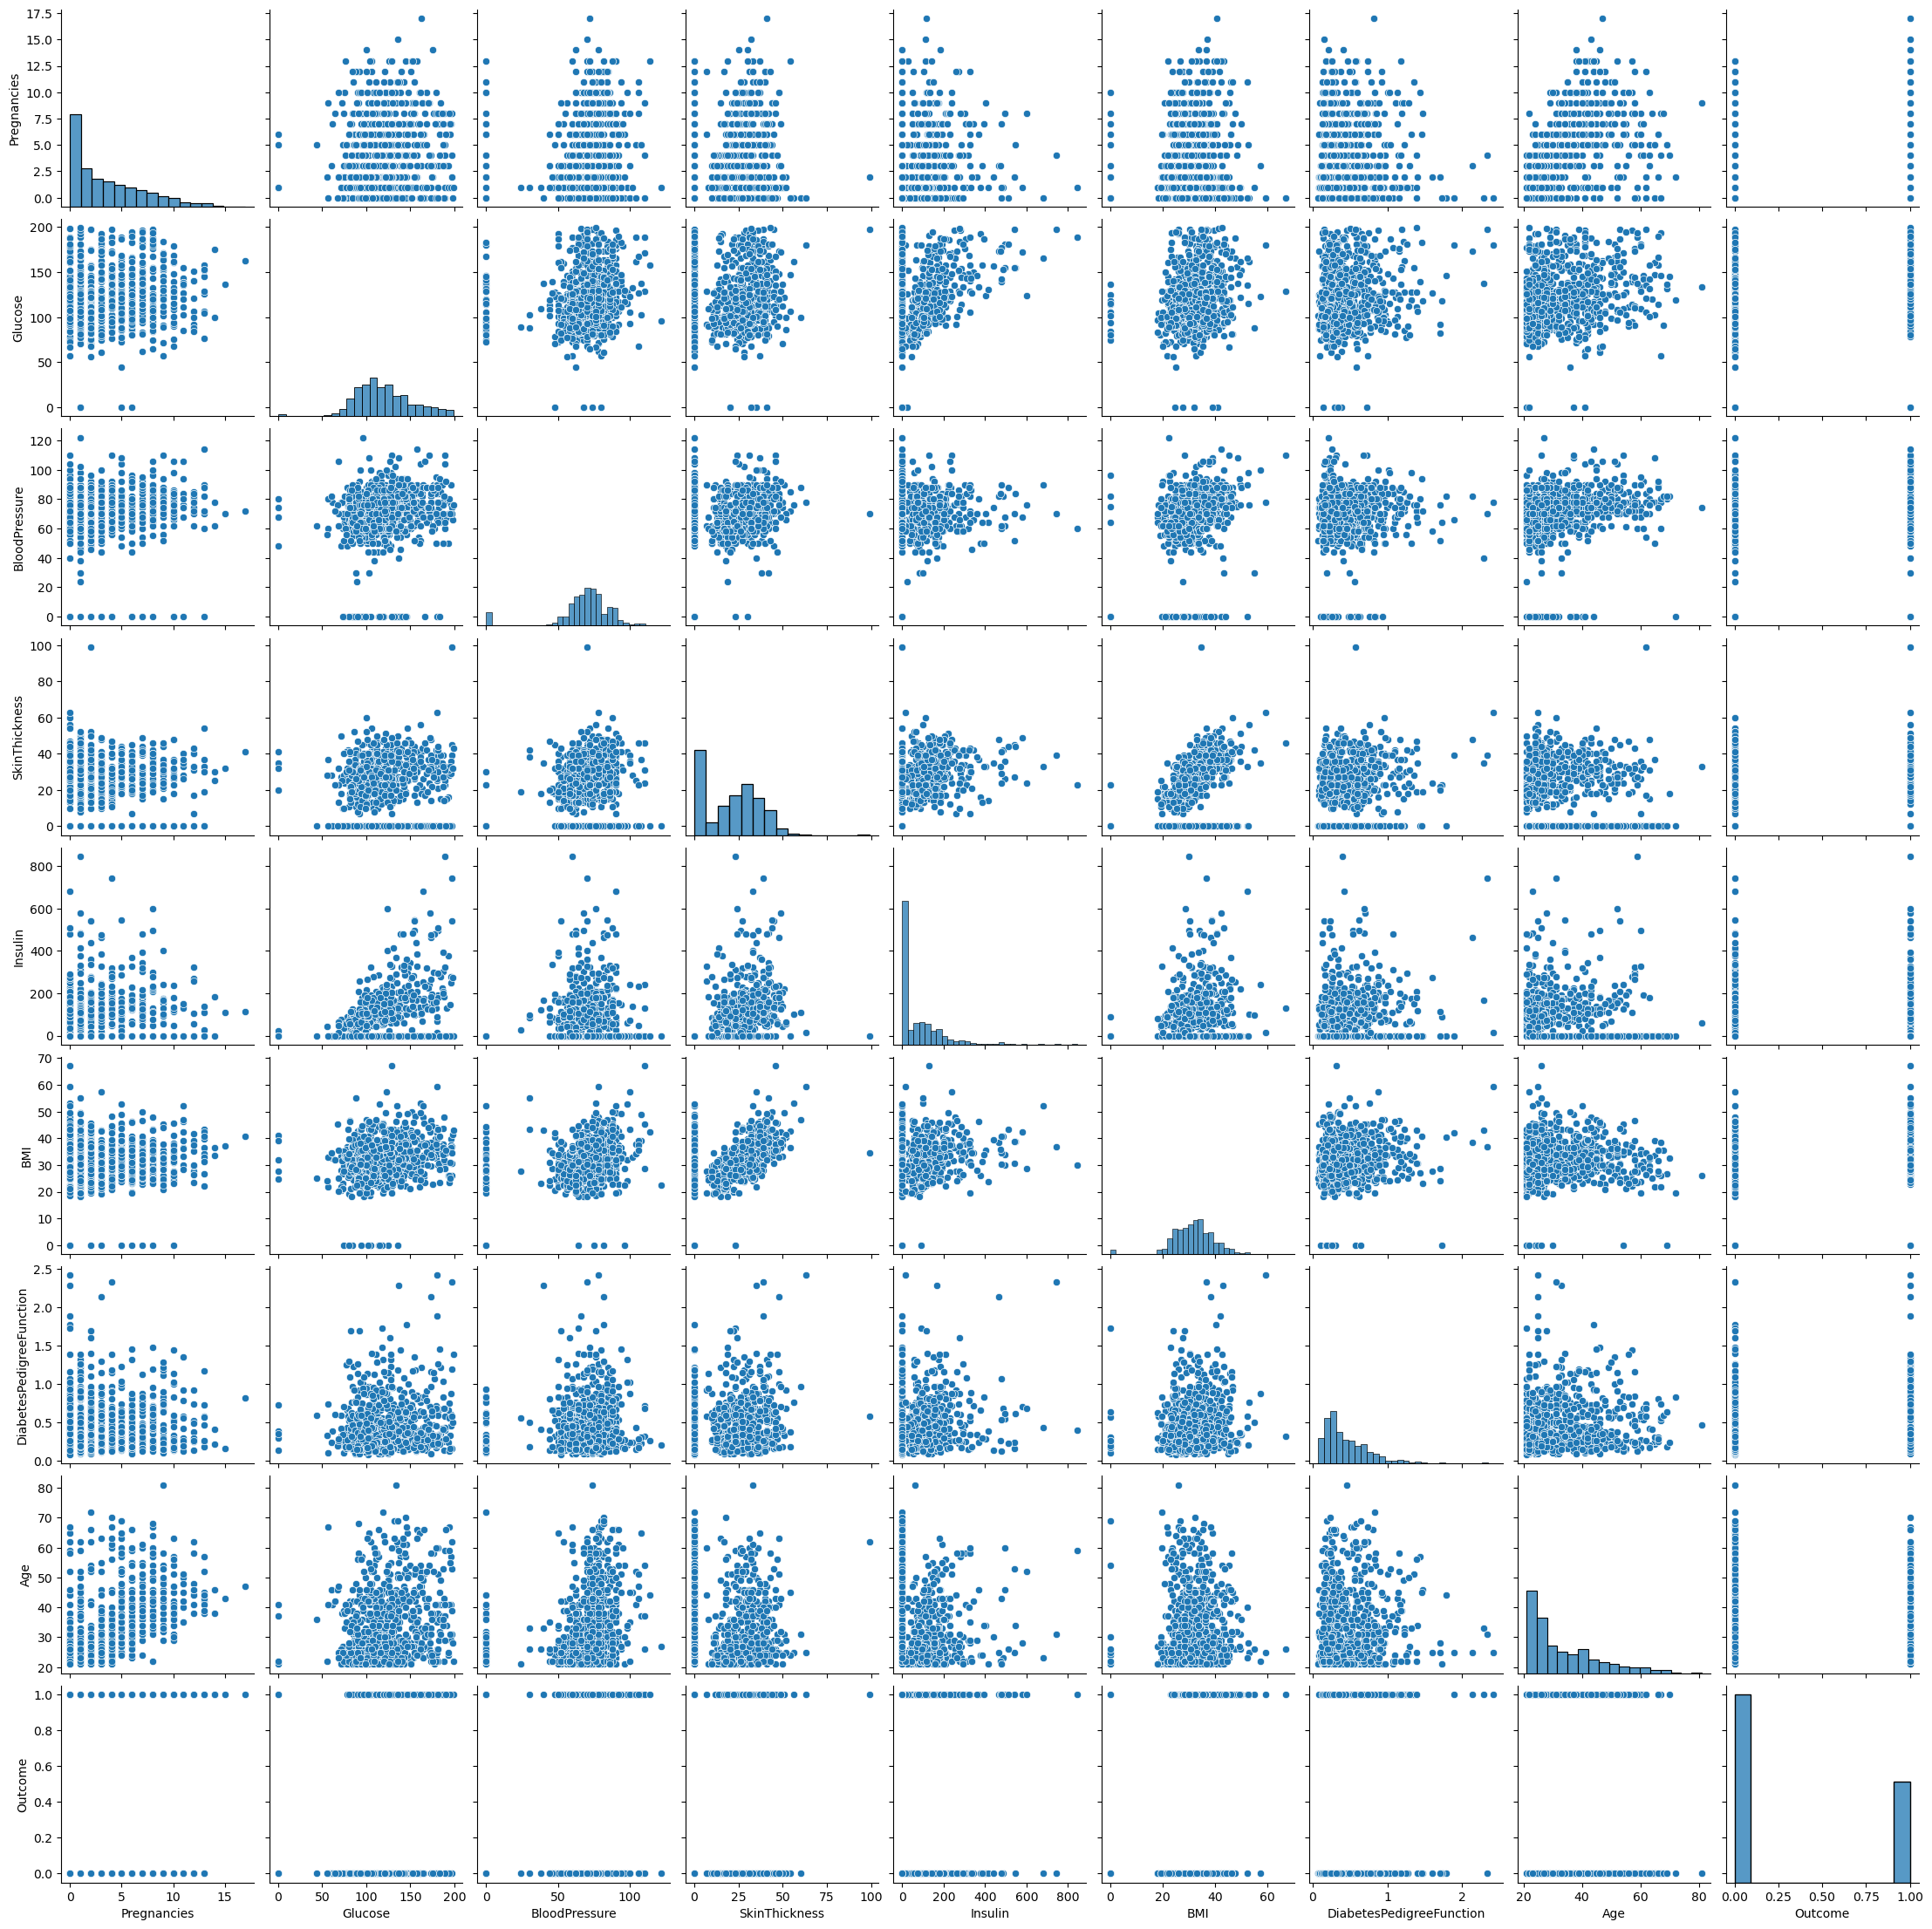

In [36]:
sns.pairplot(df)

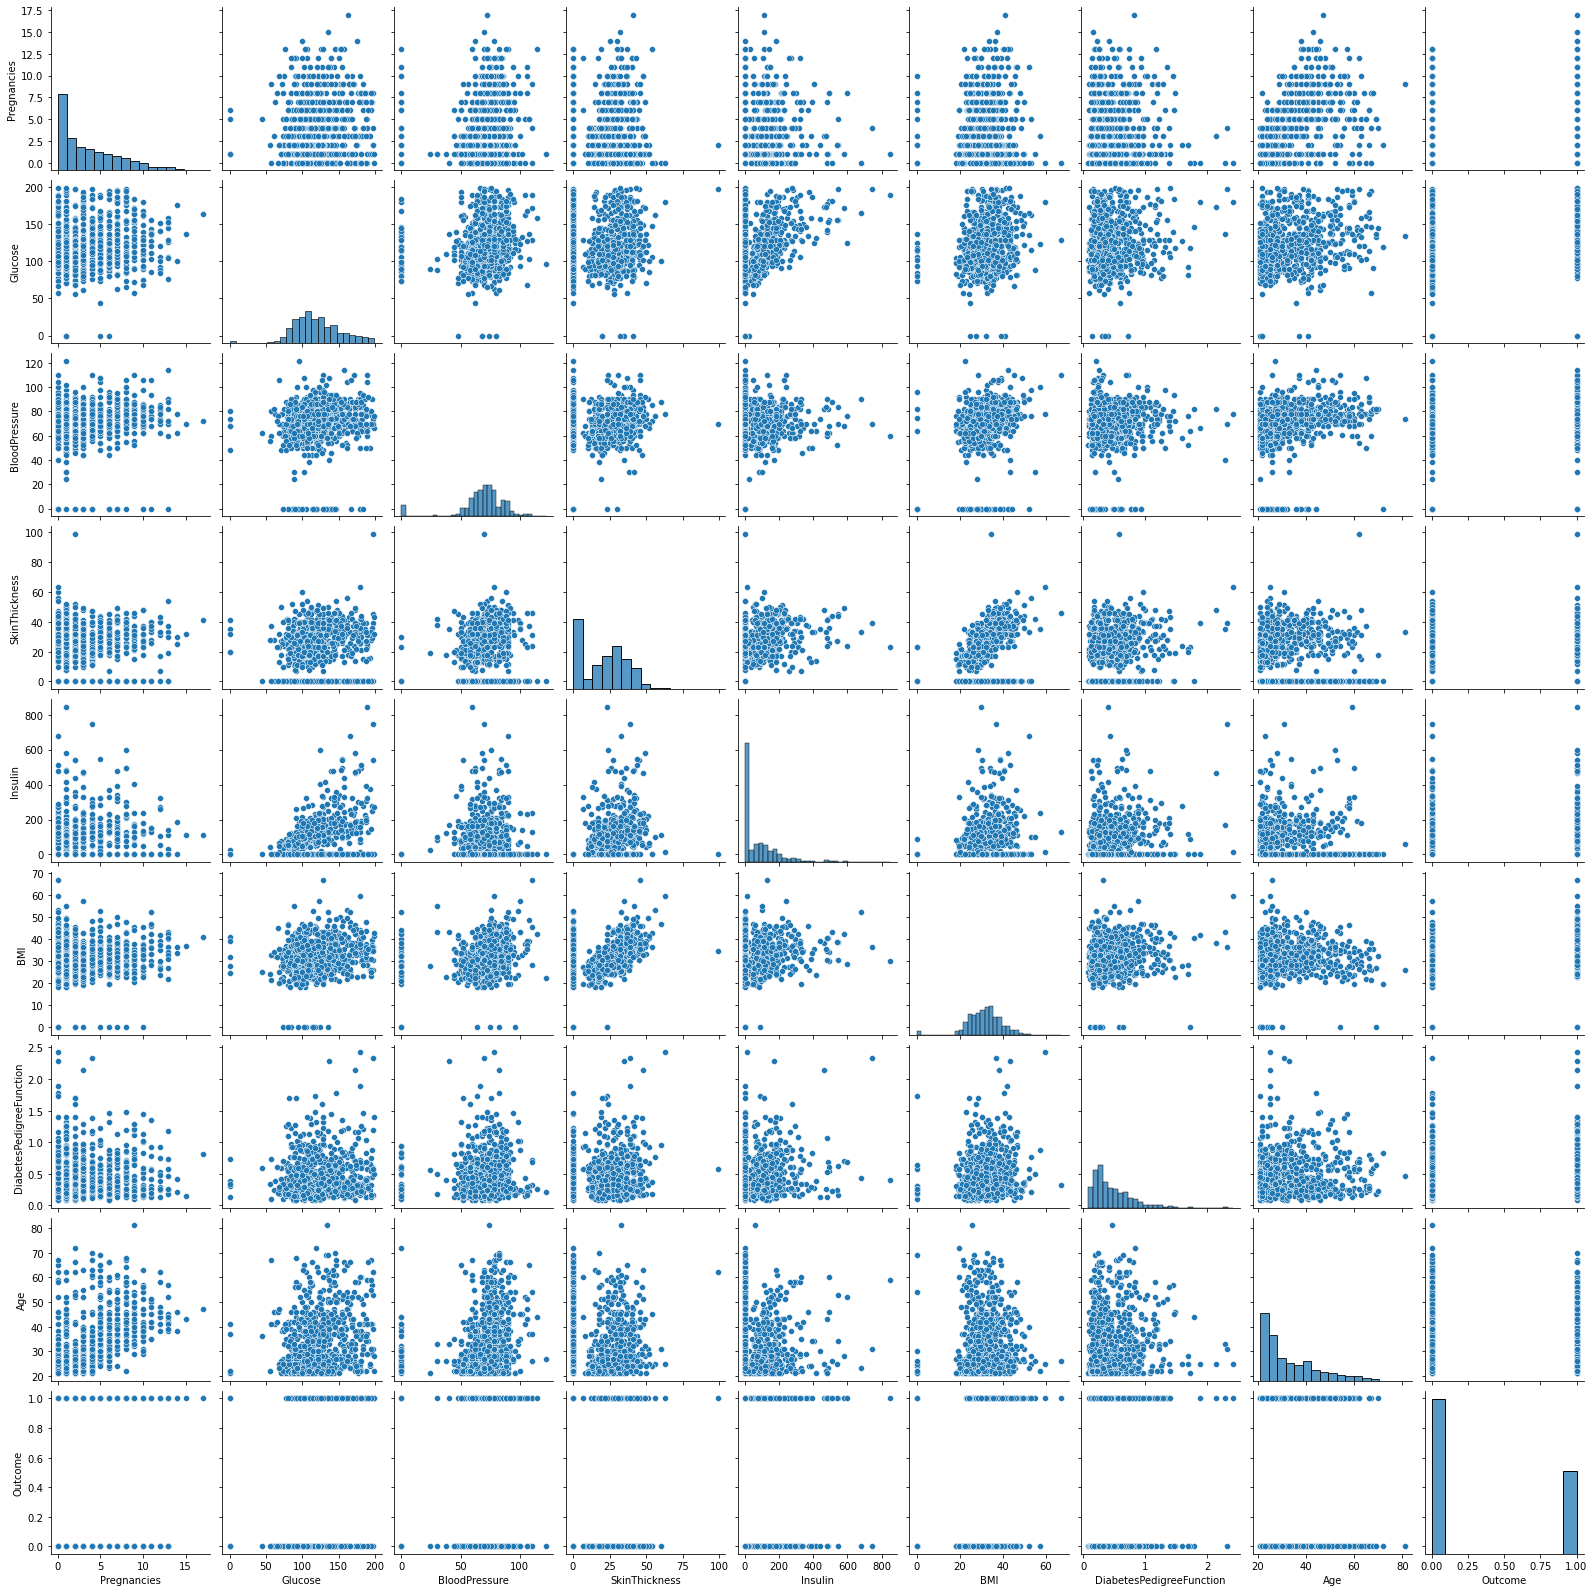

### Plot a heatmap to view the correlation between the input and target variables

<Axes: >

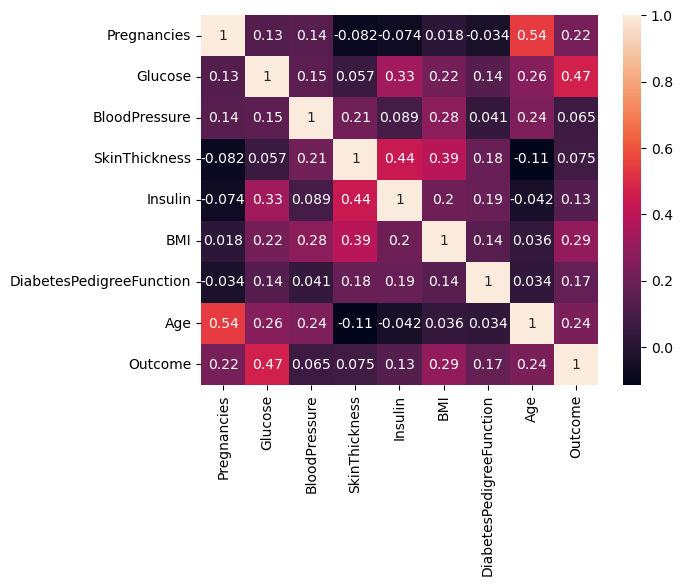

In [38]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

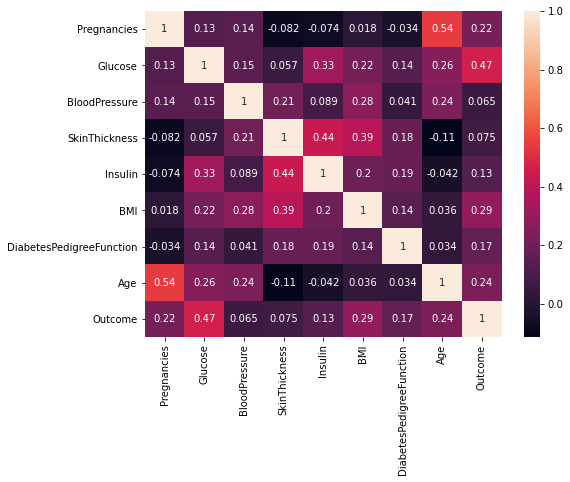

### Split the dataset into input and target variables

In [51]:
x=df.drop(columns='Outcome')
y=df['Outcome']

### Standardize the data with StandardScaler

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()

In [54]:
x_scaled=scaler.fit_transform(x)

In [56]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [57]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [21]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### Split the dataset into Training and Testing set

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25)

### Check the shape of X_train and X_test

In [68]:
x_train.shape

(192, 8)

In [69]:
y_train.shape

(192,)

### Create a Support Vector Machine model and train it

In [70]:
from sklearn.svm import SVC

In [71]:
model=SVC()

In [72]:
#Train the model
model.fit(x_train,y_train)

SVC()

### Check the score of the model

In [73]:
model.score(x_train,y_train)

0.8541666666666666

### Make prediction with X_test

In [75]:
y_pred=model.predict(x_test)

### Check the accuracy of our model

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [78]:
accuracy_score(y_pred,y_test)

0.7395833333333334

### Create a confusion matrix

In [79]:
print(confusion_matrix(y_pred,y_test))

[[335 117]
 [ 33  91]]


### Plot confusion matrix on heatmap

<Axes: >

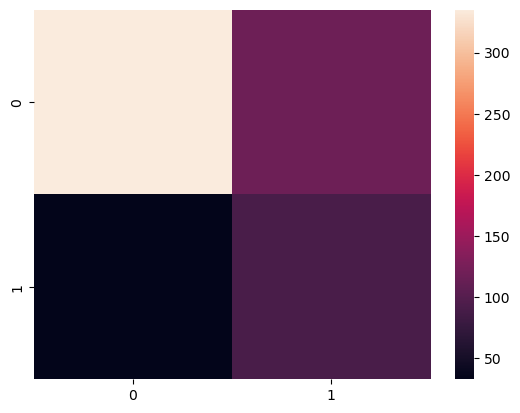

In [80]:
sns.heatmap(confusion_matrix(y_pred,y_test))

### Create a classification report

In [82]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       452
           1       0.44      0.73      0.55       124

    accuracy                           0.74       576
   macro avg       0.67      0.74      0.68       576
weighted avg       0.81      0.74      0.76       576



***

# <span style = "color: green;font-size:40px"> Great Job! </span>